In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# I want to load a csv placed in ../logs/log_ear_mar.csv
# with this header timestamp;path_img;ear;mar

# And load into a dataframe using pandas

file_path = "../logs/log_all.csv"

df = pd.read_csv(file_path, sep=";", header=None, names=["timestamp", "path_img", "ear", "mar", "landmarks", "prediction"])

In [22]:
# cast ear and mar to float
df['ear'] = df['ear'].astype(float)
df['mar'] = df['mar'].astype(float)

# delete rows with ear or mar <= 0
df = df[df['ear'] > 0]
df = df[df['mar'] > 0]

In [23]:
FRAMES = 10

# add columns with min and max values for the past 100 frames of each timestamp and for category
df['ear_min'] = df['ear'].rolling(FRAMES).min()
df['ear_max'] = df['ear'].rolling(FRAMES).max()
df['mar_min'] = df['mar'].rolling(FRAMES).min()
df['mar_max'] = df['mar'].rolling(FRAMES).max()
# add columns with the mean of the past FRAMES seconds of each timestamp and for category
df['ear_mean'] = df['ear'].rolling(FRAMES).mean()
df['mar_mean'] = df['mar'].rolling(FRAMES).mean()

# add columns with the std of the past FRAMES seconds of each timestamp and for category
df['ear_std'] = df['ear'].rolling(FRAMES).std()
df['mar_std'] = df['mar'].rolling(FRAMES).std()

# add columns with the median of the past FRAMES seconds of each timestamp and for category
df['ear_median'] = df['ear'].rolling(FRAMES).median()
df['mar_median'] = df['mar'].rolling(FRAMES).median()

# add columns with the variance of the past FRAMES seconds of each timestamp and for category
df['ear_var'] = df['ear'].rolling(FRAMES).var()
df['mar_var'] = df['mar'].rolling(FRAMES).var()

# # add columns with the skew of the past FRAMES seconds of each timestamp and for category
df['ear_skew'] = df['ear'].rolling(FRAMES).skew()
df['mar_skew'] = df['mar'].rolling(FRAMES).skew()

# # add columns with the kurt of the past FRAMES seconds of each timestamp and for category
df['ear_kurt'] = df['ear'].rolling(FRAMES).kurt()
df['mar_kurt'] = df['mar'].rolling(FRAMES).kurt()

# Drop rows with NaN values
df = df.dropna()


df

,timestamp,path_img,ear,mar,landmarks,prediction,ear_min,ear_max,mar_min,mar_max,...,ear_std,mar_std,ear_median,mar_median,ear_var,mar_var,ear_skew,mar_skew,ear_kurt,mar_kurt
9,20230917213349627777,./frames/train/frame_20230917213349627777.jpg,0.303363,0.050924,"[array([479, 354]), array([485, 393]), array([...",0,0.186867,0.334583,0.040725,0.093008,...,0.047551,0.017132,0.278485,0.055068,0.002261,0.000294,-0.351794,1.097425,-0.873910,0.545117
10,20230917213349791915,./frames/train/frame_20230917213349791915.jpg,0.306768,0.065031,"[array([498, 347]), array([505, 385]), array([...",0,0.186867,0.334583,0.040725,0.084471,...,0.045256,0.012753,0.283943,0.055068,0.002048,0.000163,-0.870369,0.961032,0.270700,1.763991
11,20230917213349957318,./frames/train/frame_20230917213349957318.jpg,0.218554,0.058120,"[array([497, 356]), array([504, 393]), array([...",0,0.207164,0.334583,0.040725,0.084471,...,0.039341,0.012701,0.283943,0.057574,0.001548,0.000161,-0.563064,0.828058,-0.131470,1.641230
12,20230917213350126148,./frames/train/frame_20230917213350126148.jpg,0.278853,0.133038,"[array([497, 353]), array([504, 390]), array([...",0,0.218554,0.334583,0.040775,0.133038,...,0.031232,0.026041,0.283943,0.058472,0.000975,0.000678,-0.557587,2.187100,1.474192,5.381919
13,20230917213350290753,./frames/train/frame_20230917213350290753.jpg,0.301346,0.154350,"[array([498, 351]), array([503, 389]), array([...",0,0.218554,0.334583,0.040775,0.154350,...,0.029919,0.037408,0.286336,0.060916,0.000895,0.001399,-1.078274,1.500414,3.184245,1.154162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,20230917213445916400,./frames/train/frame_20230917213445916400.jpg,0.318163,0.038219,"[array([487, 377]), array([494, 412]), array([...",0,0.170084,0.343283,0.022974,0.223203,...,0.063079,0.059705,0.301044,0.038001,0.003979,0.003565,-0.781867,3.079077,-1.108904,9.617017
329,20230917213446071755,./frames/train/frame_20230917213446071755.jpg,0.324961,0.033878,"[array([487, 375]), array([493, 410]), array([...",0,0.170084,0.343283,0.022974,0.048956,...,0.060312,0.007106,0.308854,0.037784,0.003638,0.000050,-1.367431,0.015203,0.579666,0.849828
330,20230917213446244030,./frames/train/frame_20230917213446244030.jpg,0.325135,0.045452,"[array([488, 376]), array([493, 411]), array([...",0,0.178919,0.343283,0.029304,0.048956,...,0.046430,0.006183,0.311323,0.038001,0.002156,0.000038,-2.205985,0.331874,5.507519,0.069262
331,20230917213446410906,./frames/train/frame_20230917213446410906.jpg,0.233033,0.033170,"[array([488, 375]), array([494, 410]), array([...",0,0.178919,0.343283,0.029334,0.048956,...,0.050168,0.005695,0.311323,0.038001,0.002517,0.000032,-1.760723,0.555551,2.644537,0.512206


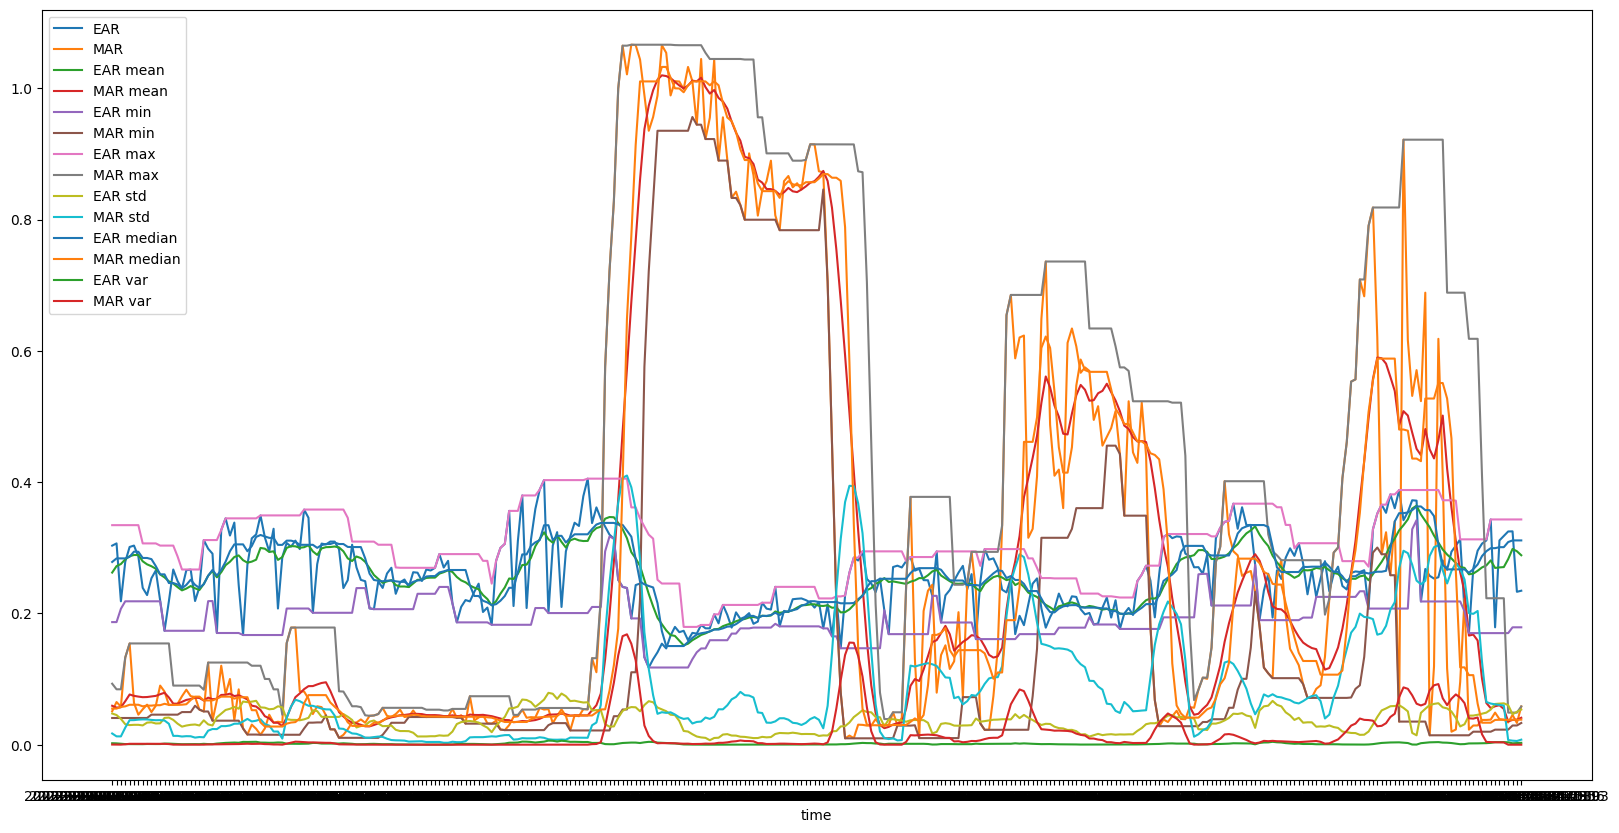

In [24]:
#Plot feature vs time
plt.figure(figsize=(20,10))
plt.plot(df['timestamp'], df['ear'], label="EAR")
plt.plot(df['timestamp'], df['mar'], label="MAR")
plt.plot(df['timestamp'], df['ear_mean'], label="EAR mean")
plt.plot(df['timestamp'], df['mar_mean'], label="MAR mean")
plt.plot(df['timestamp'], df['ear_min'], label="EAR min")
plt.plot(df['timestamp'], df['mar_min'], label="MAR min")
plt.plot(df['timestamp'], df['ear_max'], label="EAR max")
plt.plot(df['timestamp'], df['mar_max'], label="MAR max")
plt.plot(df['timestamp'], df['ear_std'], label="EAR std")
plt.plot(df['timestamp'], df['mar_std'], label="MAR std")
plt.plot(df['timestamp'], df['ear_median'], label="EAR median")
plt.plot(df['timestamp'], df['mar_median'], label="MAR median")
plt.plot(df['timestamp'], df['ear_var'], label="EAR var")
plt.plot(df['timestamp'], df['mar_var'], label="MAR var")
plt.xlabel('time')
plt.legend()
plt.show()